# Image Pre-processing

In [12]:
import cv2
import sys
import numpy as np

sys.path.append('../../core/python-ocr/utils')
sys.path.append('../../core/python-ocr/')

from matplotlib import pyplot as plt
from pathlib import Path
from typing import Union

In [13]:
from image_utils import load_image, convert_to_grayscale, resize_image
from preprocessing.image_preprocessor import reduce_noise
from config import TEST_IMAGES_DIR

In [14]:
print(TEST_IMAGES_DIR)


/home/yutharsan/Desktop/PortableTextDescriptor/research/notebooks/../../research/test-images


In [15]:
def display_noise_reduction_comparison(images, func, max_images=5):
    """
    Display noise reduction experiments for multiple images.
    Each image gets its own row showing: Original, Gaussian, Bilateral, Combined
    """
    n_images = min(len(images), max_images)  # Limit to avoid overcrowding
    titles = ['Original', 'Gaussian', 'Bilateral', 'Gaussian + Bilateral']

    fig, axes = plt.subplots(n_images, 4, figsize=(20, 5 * n_images))

    # Handle case where there's only one image (axes won't be 2D)
    if n_images == 1:
        axes = axes.reshape(1, -1)

    for row, image in enumerate(images[:n_images]):
        # Apply noise reduction experiments
        i0, i1, i2, i3 = func(image)
        processed_images = [i0, i1, i2, i3]

        for col, (processed_img, title) in enumerate(zip(processed_images, titles)):
            axes[row, col].imshow(processed_img, cmap='gray')
            axes[row, col].set_title(f'Image {row+1}: {title}')
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

In [16]:
def display_processing_comparison(images, processing_func, titles=None, max_images=5, figsize_per_image=5):
    """
    Adaptive display function that works with any processing function.
    Automatically detects the number of returned images and adjusts the layout.

    Args:
        images: List of input images
        processing_func: Function that processes an image and returns multiple results
        titles: List of titles for each processed image. If None, auto-generates titles
        max_images: Maximum number of images to display
        figsize_per_image: Height per image row in the figure
    """
    if not images:
        print("No images provided!")
        return

    # Test the function with the first image to determine number of outputs
    test_result = processing_func(images[0])

    # Handle case where function returns a single image vs multiple images
    if isinstance(test_result, (list, tuple)):
        n_outputs = len(test_result)
        processed_images = test_result
    else:
        # Single output case
        n_outputs = 1
        processed_images = [test_result]

    # Generate default titles if not provided
    if titles is None:
        if n_outputs == 1:
            titles = ['Processed']
        elif n_outputs == 2:
            titles = ['Method 1', 'Method 2']
        elif n_outputs == 3:
            titles = ['Method 1', 'Method 2', 'Method 3']
        elif n_outputs == 4:
            titles = ['Original', 'Method 1', 'Method 2', 'Combined']
        elif n_outputs == 5:
            titles = ['Original', 'Method 1', 'Method 2', 'Method 3', 'Combined']
        else:
            titles = [f'Output {i+1}' for i in range(n_outputs)]

    # Ensure titles list matches number of outputs
    if len(titles) != n_outputs:
        print(f"Warning: {len(titles)} titles provided but function returns {n_outputs} images.")
        titles = titles[:n_outputs] + [f'Output {i+1}' for i in range(len(titles), n_outputs)]

    n_images = min(len(images), max_images)

    # Create figure with adaptive size
    fig, axes = plt.subplots(n_images, n_outputs,
                            figsize=(4 * n_outputs, figsize_per_image * n_images))

    # Handle different subplot configurations
    if n_images == 1 and n_outputs == 1:
        axes = [[axes]]  # Make it 2D for consistent indexing
    elif n_images == 1:
        axes = [axes]  # Make it 2D for consistent indexing
    elif n_outputs == 1:
        axes = [[ax] for ax in axes]  # Make it 2D for consistent indexing

    # Process and display each image
    for row, image in enumerate(images[:n_images]):
        # Apply the processing function
        result = processing_func(image)

        # Handle single vs multiple outputs
        if isinstance(result, (list, tuple)):
            processed_imgs = result
        else:
            processed_imgs = [result]

        # Display each processed image
        for col, (processed_img, title) in enumerate(zip(processed_imgs, titles)):
            axes[row][col].imshow(processed_img, cmap='gray')

            # Add title (only on first row to avoid clutter)
            if row == 0:
                axes[row][col].set_title(title, fontsize=12)

            axes[row][col].axis('off')

            # Add image number label on the left
            if col == 0:
                axes[row][col].set_ylabel(f'Image {row+1}', rotation=90,
                                        fontsize=10, labelpad=15)

    plt.tight_layout()
    plt.show()

    # Print summary information
    print(f"Displayed {n_images} images with {n_outputs} processing methods each.")
    if hasattr(processing_func, '__name__'):
        print(f"Processing function: {processing_func.__name__}")

In [17]:
path_lenna_noise = TEST_IMAGES_DIR / "lenna_noise_grayscale.png"
path_clograd_noise = TEST_IMAGES_DIR / "clogard_noise.png"

path_img_1 = TEST_IMAGES_DIR / "1.jpg"
path_img_2 = TEST_IMAGES_DIR / "2.jpg"
path_img_3 = TEST_IMAGES_DIR / "3.jpg"
path_img_4 = TEST_IMAGES_DIR / "4.jpg"

path_images = [path_img_1, path_img_2, path_img_3, path_img_4, path_lenna_noise]

images = [resize_image(convert_to_grayscale(load_image(image)), max_width=512, max_height=512) for image in path_images]

In [18]:
def experiment_reduce_noise(image: np.ndarray) -> np.ndarray:
    """Apply noise reduction filters"""

    kernel = (5, 5)

    blurred = cv2.GaussianBlur(image, kernel, 0)

    denoised = cv2.bilateralFilter(image, 3, 40, 40)

    both = cv2.bilateralFilter(blurred, 9, 100, 100)

    return image, blurred, denoised, both

Text(0.5, 1.0, 'Gaussian + Biliteral')

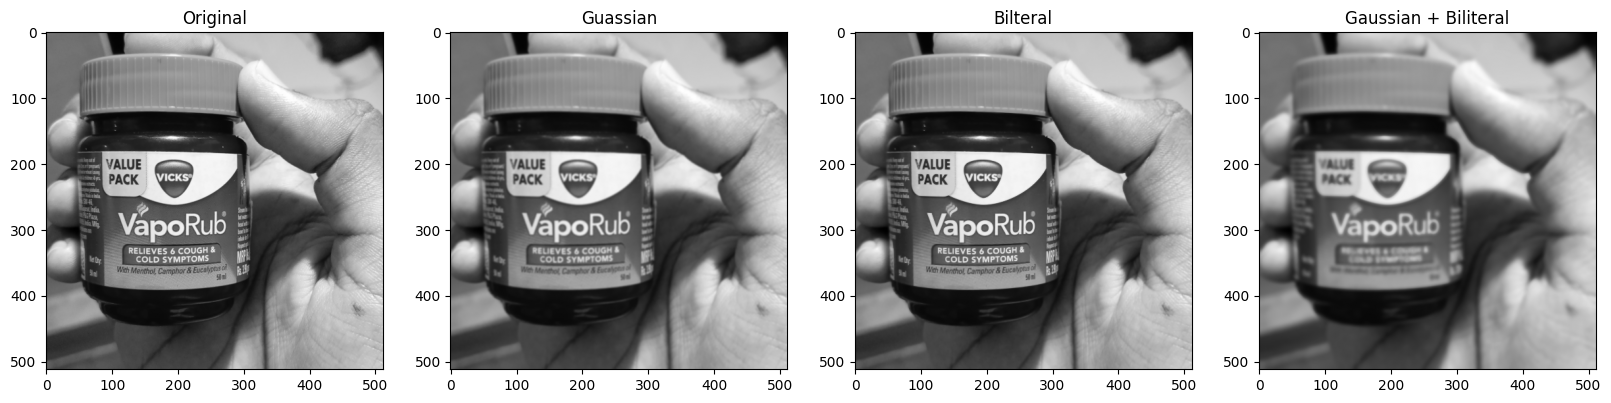

In [19]:

image = images[0]


i0, i1, i2, i3 = experiment_reduce_noise(image)

_, (p0, p1, p2, p3) = plt.subplots(1, 4, figsize= (20, 5))

p0.imshow(i0, cmap='gray')
p0.set_title('Original')

p1.imshow(i1, cmap='gray')
p1.set_title('Guassian')

p2.imshow(i2, cmap='gray')
p2.set_title('Bilteral')

p3.imshow(i3, cmap='gray')
p3.set_title('Gaussian + Biliteral')

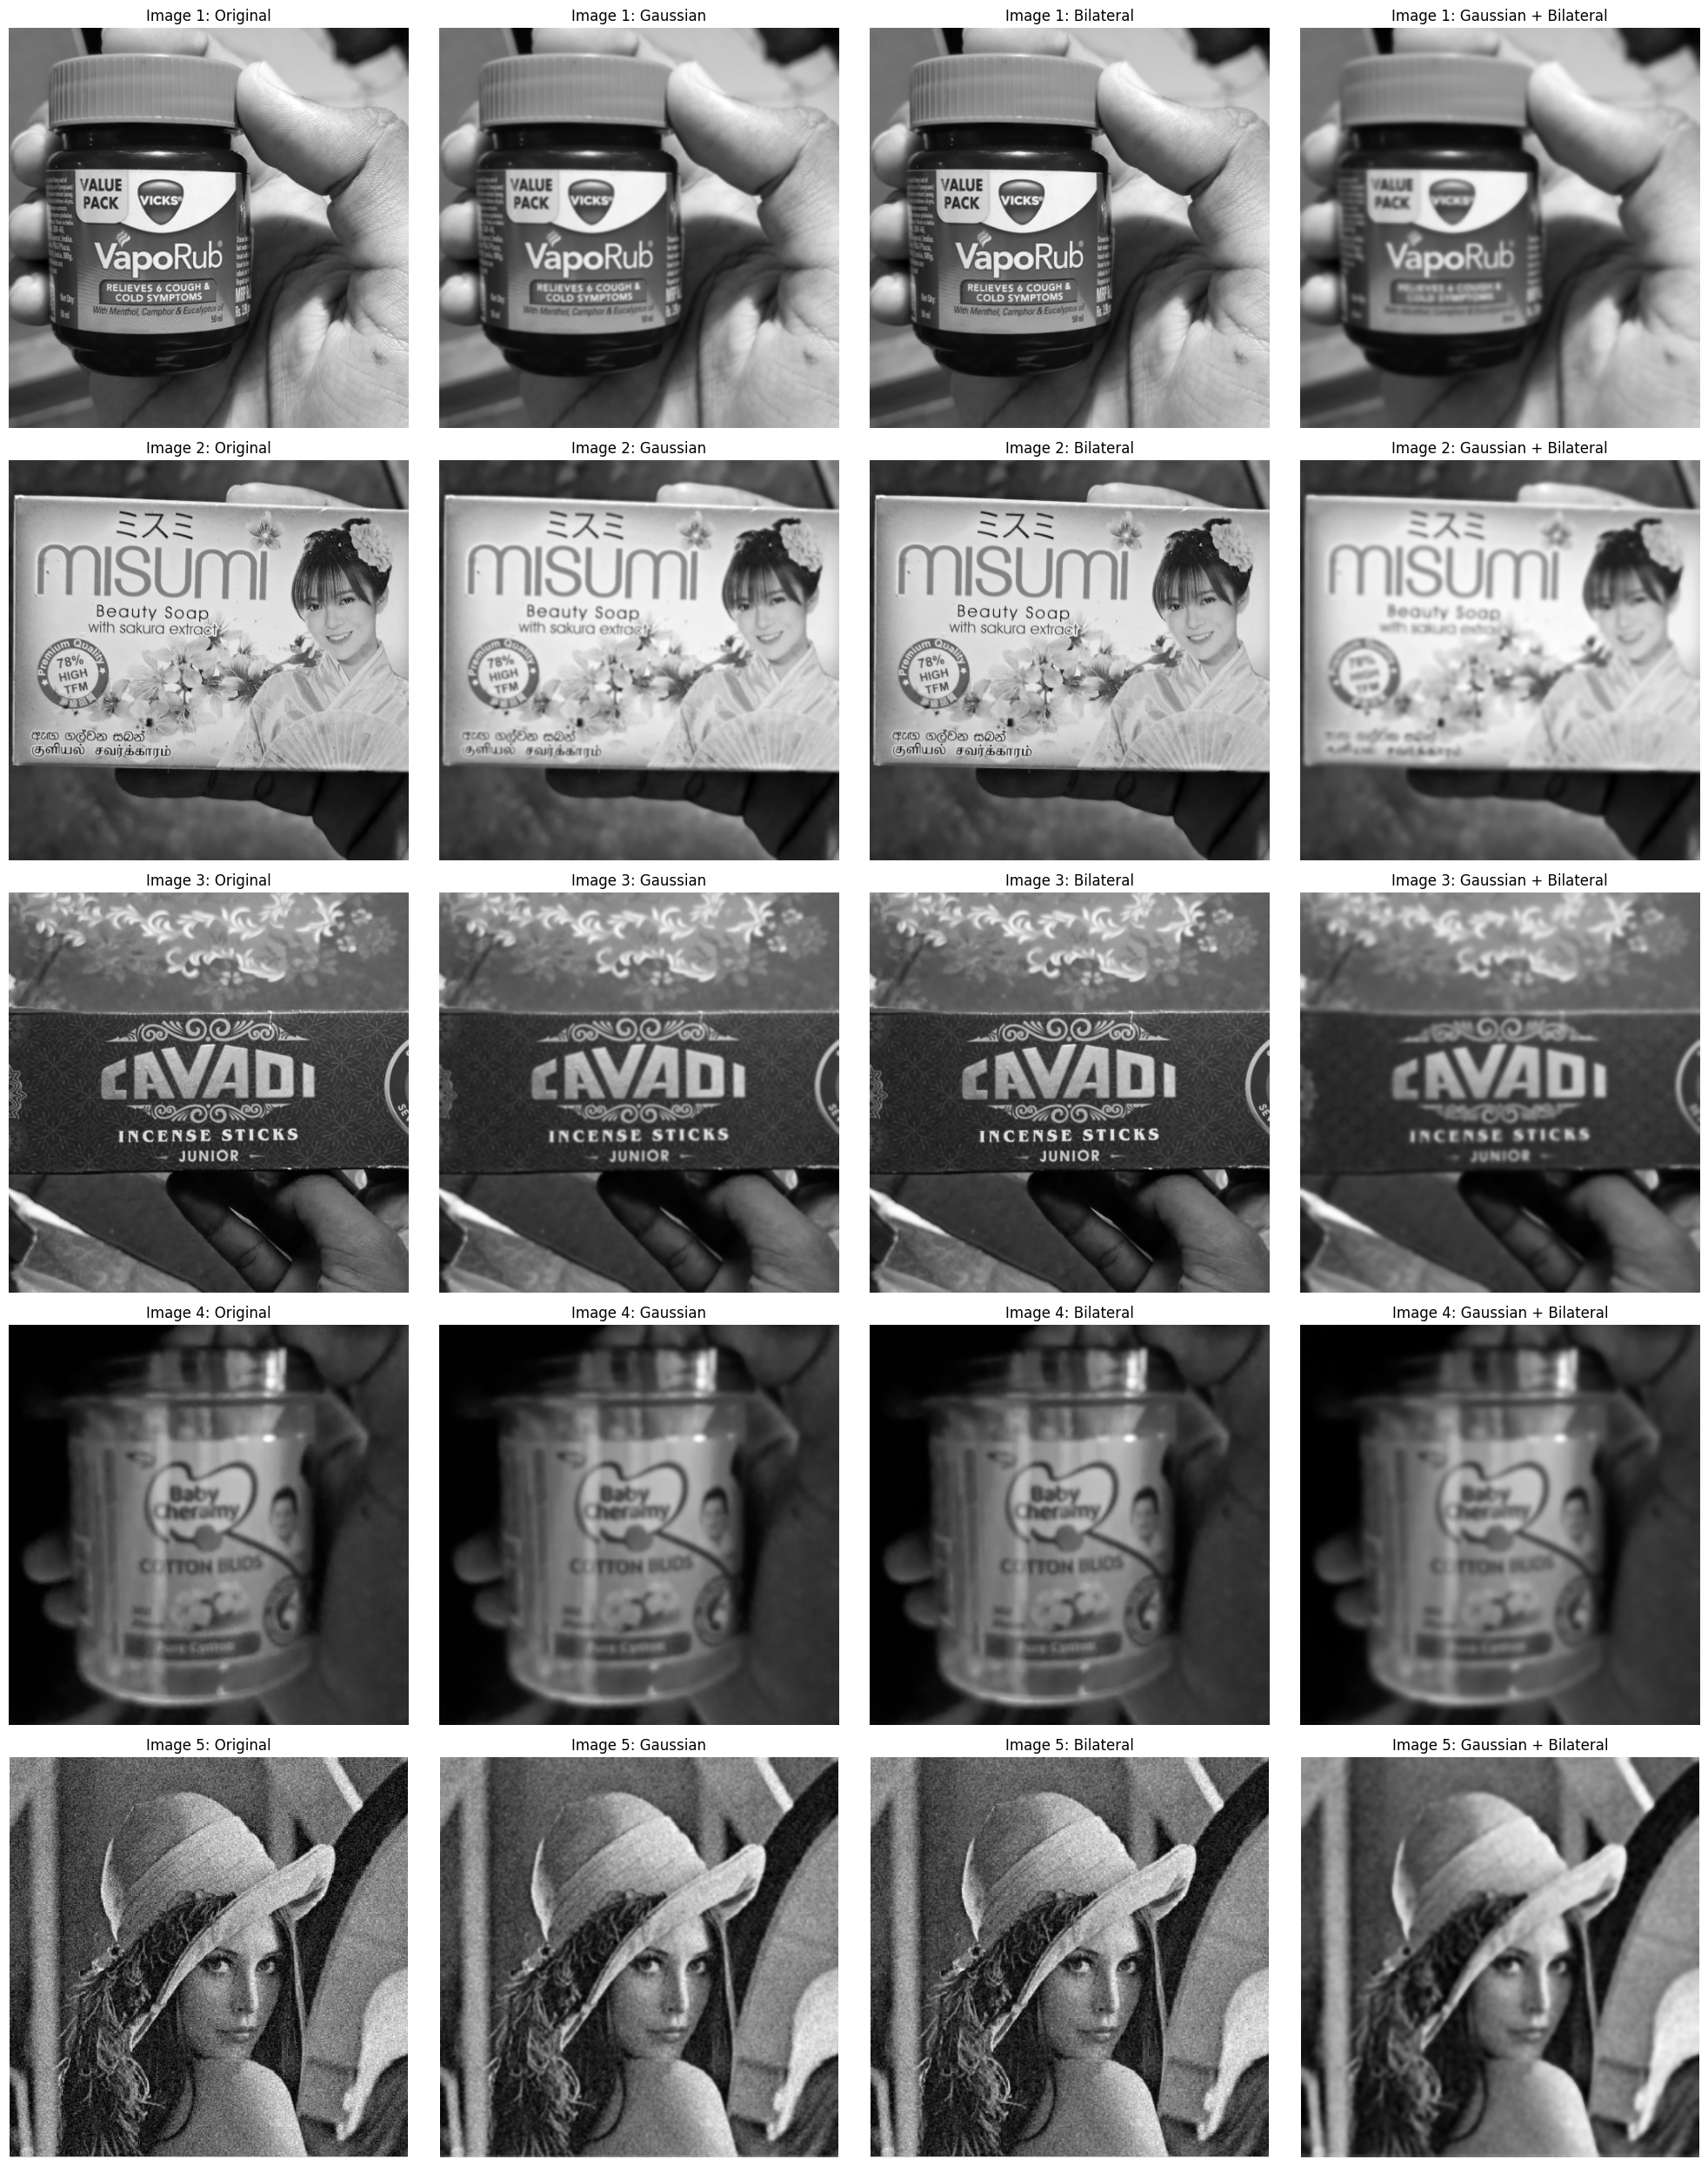

In [20]:
display_noise_reduction_comparison(images, experiment_reduce_noise)

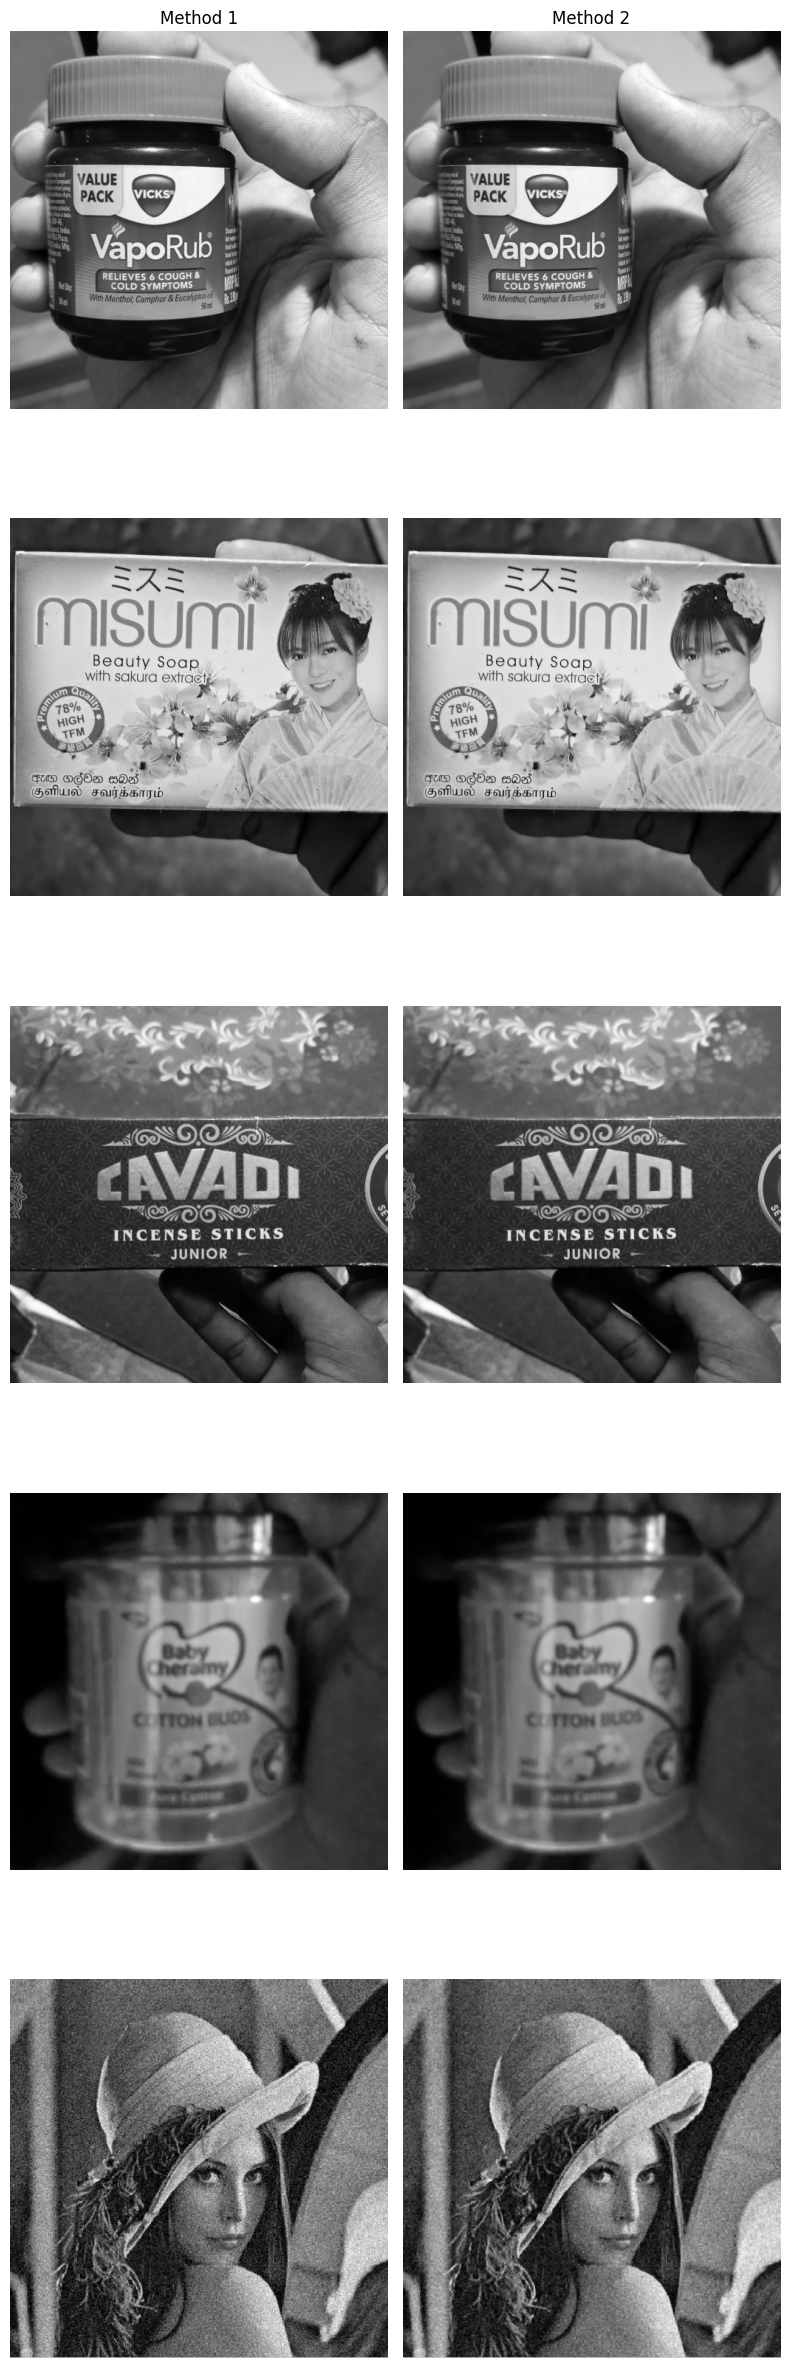

Displayed 5 images with 2 processing methods each.
Processing function: reduce_noise


In [21]:
display_processing_comparison(images, reduce_noise)